In [1]:
import nb_utils

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


In [2]:
# CREATE LATENT DATASET
import pickle
from lightning_modules.utils import create_lightning_module
from utils import fix_rds_path

with open('/store/CIA/js2164/rds/gb511/projects/scoreVAE/experiments/paper/pretrained/celebA_64/only_ResNetEncoder_VAE_KLweight_0.01/config.pkl', 'rb') as f:
  config = pickle.load(f)
config.model.time_conditional = True
model = create_lightning_module(config)
pl_module = model.load_from_checkpoint(fix_rds_path(config.model.checkpoint_path), config=config)

Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/prior/checkpoints/best/last.ckpt`


loaded


Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/only_ResNetEncoder_VAE_KLweight_0.01/checkpoints/best/last.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/prior/checkpoints/best/last.ckpt`


loaded


In [4]:
import run_lib
import torch
import pandas as pd
import numpy as np
import pickle
import os
from lightning_modules.VAE import VAE
from dim_reduction import inspect_VAE
from utils import fix_rds_path
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
from lightning_data_modules.ImageDatasets import CelebAAnnotatedDataset



# get config
# from configs.VAE.celebA import get_config
# config = get_config()
# get home dir
home = os.path.expanduser('~')
config.data.base_dir = f'{home}/rds_work/datasets/'
config.data.dataset = 'celebA-HQ-160'
config.data.attributes = ['Male']
dataset = CelebAAnnotatedDataset(config, phase='train')
dataloader = DataLoader(dataset, batch_size=int(1e4), shuffle=True, num_workers=0)
data_iter = iter(dataloader)
train_data = next(data_iter)
test_data = next(data_iter)

In [5]:
z_train = pl_module.encode(train_data[0])

AttributeError: 'list' object has no attribute 'shape'

In [107]:
X_train = train_data[0].numpy()
y_train = train_data[1].flatten().numpy()

X_test = test_data[0].numpy()
y_test = test_data[1].flatten().numpy()

female


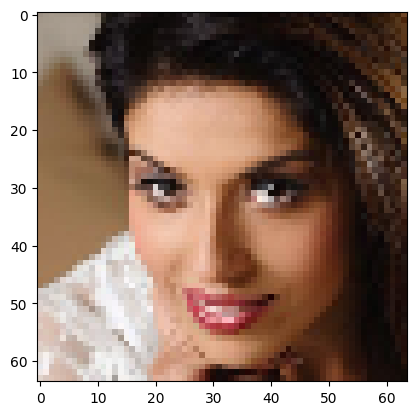

In [108]:
#plot first element in x[0]
from matplotlib import pyplot as plt
i = 3500
sex = 'male' if y_train[i] == 1 else 'female'
print(sex)
plt.imshow(X_train[i].transpose(1,2,0))
plt.show()

In [109]:
(y_test == 1).sum() / (y_test == -1).sum()

0.7448961786773687

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cls = LogisticRegression(penalty=None, max_iter=1000)
cls.fit(X_train.reshape(len(X_train), -1), y_train)

LogisticRegression(max_iter=1000, penalty=None)

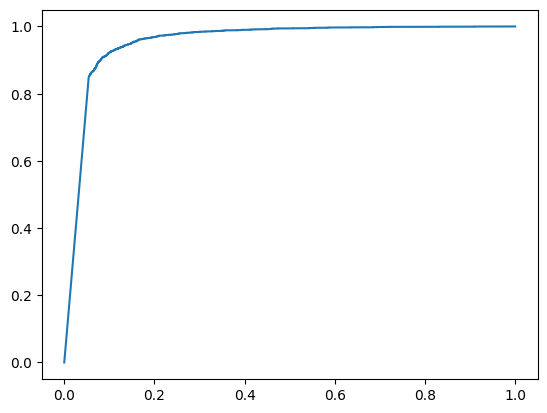

In [111]:
y_pred = cls.predict_proba(X_test.reshape(len(X_test), -1))[:,1]
roc_auc_score(y_test, y_pred)
# plot ROC
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

In [112]:
# accuracy on train
y_pred = cls.predict(X_train.reshape(len(X_train), -1))
(y_pred == y_train).mean()


1.0

In [113]:
# accuracy on test
y_pred = cls.predict(X_test.reshape(len(X_test), -1))
(y_pred == y_test).mean()

0.9116

Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/prior/checkpoints/best/last.ckpt`


loaded


Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/only_ResNetEncoder_VAE_KLweight_0.01/checkpoints/best/last.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.4.5 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../home/js2164/rds_work/projects/scoreVAE/experiments/paper/pretrained/celebA_64/prior/checkpoints/best/last.ckpt`


loaded


In [ ]:
pl_module.eval()
pl_modlue.encode